In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
cam=cv2.VideoCapture(0)
while True:
    ret,frame=cam.read()
    #ret return ture or false true when it captures an image and frame stores its pixelled frame result
    cv2.imshow("Webcam",frame)
    if cv2.waitKey(1)==13:
        #13 is ascii code for enter key
        break
cam.release()
cv2.destroyAllWindows()
    

#    ROI- Region of Interest

In [3]:
path = r'messy1.jpg'

In [4]:
img=cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #original photo is in bgr but cv2 reads in gbr format so the bad image shows when not writing this command to conve colors

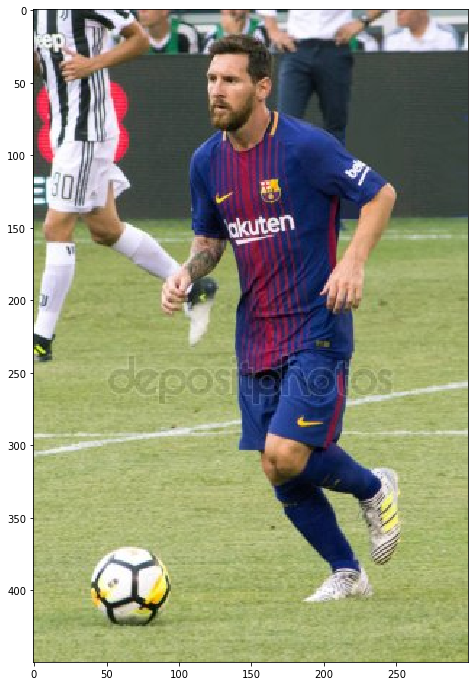

In [5]:
plt.figure(figsize=(8,12))   #to enlarge the picture
plt.imshow(img)
plt.show()

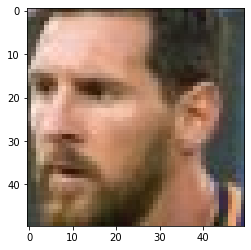

In [6]:
face=img[30:80,120:170]
face2=img[30:80,120:170]
plt.imshow(face)
plt.show()

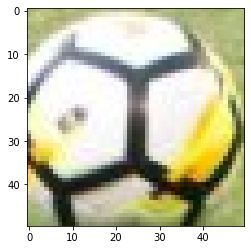

In [7]:
ball = img[370:420,45:95]
ball2=img[370:420,45:95]
plt.imshow(ball)
plt.show()

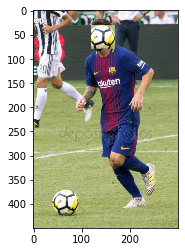

In [8]:
img[30:80,120:170] = ball
plt.imshow(img)
plt.show()

In [9]:
img=cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

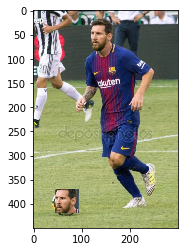

In [10]:
face=img[30:80,120:170]

img[370:420,45:95] = face
plt.imshow(img)
plt.show()

# Face Detection

In [11]:
import cv2
xml = r'face.xml'  ## harcascade
path = r'faces.jpg'
img = cv2.imread(path)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
face_cascade = cv2.CascadeClassifier(xml)

In [13]:
faces = face_cascade.detectMultiScale(img,1.4,5)
#Syntax(img, scalaing factor i.e like for 1.2 then reduce pixcels by 20%, 5 for no of pixcels to c together and then move forward)
#like when u do with 1.4 u get 15 images rather than 16 
#so we use 1.2 to get all 16 

In [14]:
faces
#the 4 coordinates are x coordinate, y coordinate, width and height
# h
# |
# |
# x,y -----w

array([[165, 451,  89,  89],
       [ 36, 155,  81,  81],
       [ 31, 300,  92,  92],
       [161, 302,  92,  92],
       [446, 302,  92,  92],
       [298, 306,  92,  92],
       [164,   4,  92,  92],
       [297,   1,  92,  92],
       [443,   5,  92,  92],
       [295, 146,  92,  92],
       [158, 139,  92,  92],
       [442, 152,  92,  92],
       [282, 289, 129, 129],
       [ 34, 446,  92,  92],
       [442, 447,  92,  92]], dtype=int32)

In [15]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    #syntax(img,(x,y)and thenother end of rectangle(x+w,y+h),color(r,g,b),width)
cv2.imshow("Faces",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#  Face Detection (Live Webcam)

In [16]:
#detecting faces

xml = r'face.xml'  ## harcascade to detect face can also be for eyes, mouth etc
face_cascade = cv2.CascadeClassifier(xml)
cam = cv2.VideoCapture(0)
while True:
    ret,frame=cam.read()
    faces = face_cascade.detectMultiScale(frame,1.2,5)    ##detection on frames
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) ##display
    cv2.imshow("Faces In Webcam",frame)
    if cv2.waitKey(1)==13:
        break
cam.release()
cv2.destroyAllWindows()

In [17]:
#detecting eyes on faces


xml = r'face.xml'  ## harcascade
eye_xml = r'eye.xml' 
path = r'faces.jpg'
img = cv2.imread(path)
face_cascade = cv2.CascadeClassifier(xml)   #first detect face
eye_cascade = cv2.CascadeClassifier(eye_xml)   #and then detect eyes on face
faces = face_cascade.detectMultiScale(img,1.2,5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  #finding faces
    my_face = img[y:y+h,x:x+w]    #storing face
    eyes = eye_cascade.detectMultiScale(my_face)    #detecting eye
    for (ex,ey,ew,eh) in eyes:      
        cv2.rectangle(my_face,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)      #displaying
cv2.imshow("Faces",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
#detecting smiles on faces 

xml = r'face.xml'  ## harcascade
smile_xml = r'smile.xml' 
path = r'smiles.jpg'
#img = cv2.imread(path)
face_cascade = cv2.CascadeClassifier(xml)
smile_cascade = cv2.CascadeClassifier(smile_xml)
faces = face_cascade.detectMultiScale(img,1.2,5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    my_face = img[y:y+h,x:x+w]
    smiles = smile_cascade.detectMultiScale(my_face,1.8,15)  #remember smiles not mouth, for mouth 1.8,5 is best
    for (sx,sy,sw,sh) in smiles:
        cv2.rectangle(my_face,(sx,sy),(sx+sw,sy+sh),(0,255,0),1)
cv2.imshow("Faces",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
#detecting smiles on faces on webcam

xml = r'face.xml'  ## harcascade
smile_xml = r'smile.xml' 
path = r'smiles.jpg'
cam = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(xml)
smile_cascade = cv2.CascadeClassifier(smile_xml)
while True:
    ret,frame=cam.read()
    faces = face_cascade.detectMultiScale(frame,1.4,10)    ##detection on frames
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) ##display
        my_face = frame[y:y+h,x:x+w]
#         smiles = smile_cascade.detectMultiScale(my_face,2,1)  #remember smiles not mouth, for mouth 1.8,5 is best
#         for (sx,sy,sw,sh) in smiles:
#             cv2.rectangle(my_face,(sx,sy),(sx+sw,sy+sh),(0,255,0),1)
        eyes = eye_cascade.detectMultiScale(my_face)    #detecting eye
        for (ex,ey,ew,eh) in eyes:      
            cv2.rectangle(my_face,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)      #displaying
    cv2.imshow("Faces In Webcam",frame)
    if cv2.waitKey(1)==13:
        break
cam.release()
cv2.destroyAllWindows()


In [20]:
#### Detecting Object By Colour

In [21]:
import cv2
import numpy as np
cam = cv2.VideoCapture(0)
while True:
    ret,frame = cam.read()   
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)  ## hue saturation value
    ### Blue Color
    low = np.array([140,150,0])
    high = np.array([180,255,255])
    image_mask = cv2.inRange(hsv,low,high)      #find colors in range low to high 
    output = cv2.bitwise_and(frame,frame,mask=image_mask)     #bitwise of frame amd frame with mask 
    cv2.imshow("Original",frame)
    cv2.imshow("Mask",image_mask)
    cv2.imshow("Output",output)
    if cv2.waitKey(1)==13:
        break
cam.release()
cv2.destroyAllWindows()

In [24]:
### Green Color
low = np.array([40,50,50])
high = np.array([80,255,255])

### Blue Color
low = np.array([100,50,50])
high = np.array([140,255,255])